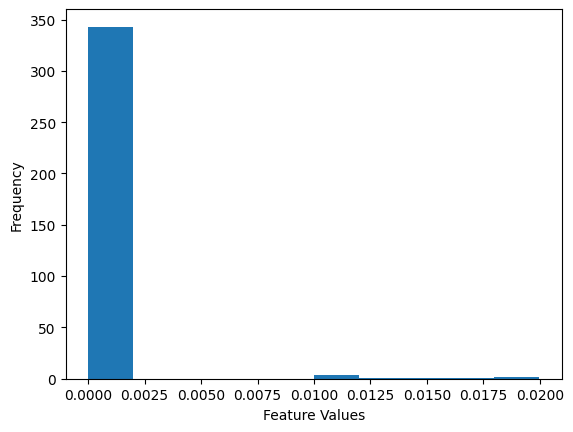

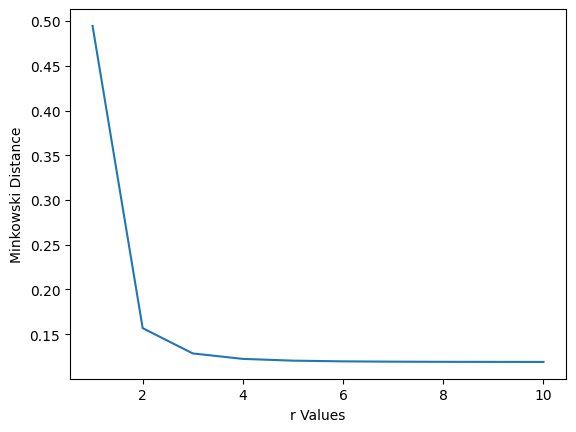

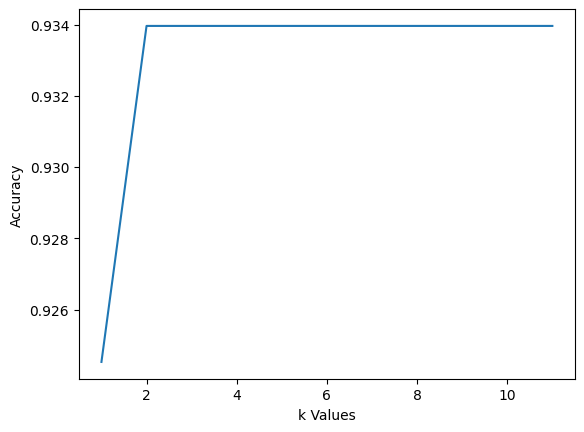

Interclass Distance: 0.002334017045454546
Feature Mean: 0.00036818749999999997
Feature Variance: 5.455506822798296e-06
Confusion Matrix:
 [[89  0]
 [ 7 10]]
Precision: 1.0
Recall: 0.5882352941176471
F1 Score: 0.7407407407407407


In [13]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from numpy.linalg import norm 

# Load the dataset
data, meta = arff.loadarff("3sources_bbc1000.arff")

# Convert ARFF data to a numpy array
dataset = np.array(data.tolist(), dtype=float)

# A1. Evaluate Intraclass Spread and Interclass Distances

class1_data = dataset[:, 4]
class2_data = dataset[:, 3]  

mean_class1 = np.mean(class1_data, axis=0)
mean_class2 = np.mean(class2_data, axis=0)

spread_class1 = np.std(class1_data, axis=0)
spread_class2 = np.std(class2_data, axis=0)

interclass_distance = norm(mean_class1 - mean_class2)

# A2. Observe Density Pattern for a Feature

feature_data = dataset[:, 1]  

plt.hist(feature_data, bins='auto')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.show()

feature_mean = np.mean(feature_data)
feature_variance = np.var(feature_data)

# A3. Calculate Minkowski Distance

feature_vector1 = dataset[:, 1]  
feature_vector2 = dataset[:, 2]  
r_values = range(1, 11)
distances = [minkowski(feature_vector1, feature_vector2, r) for r in r_values]

plt.plot(r_values, distances)
plt.xlabel('r Values')
plt.ylabel('Minkowski Distance')
plt.show()
# A4-A8. Train and Test kNN Classifier
X = dataset[:, :-1]
y = dataset[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

accuracy = neigh.score(X_test, y_test)

predicted_classes = neigh.predict(X_test)

k_values = range(1, 12)
accuracy_values = []

for k in k_values:
    neigh_k = KNeighborsClassifier(n_neighbors=k)
    neigh_k.fit(X_train, y_train)
    accuracy_k = neigh_k.score(X_test, y_test)
    accuracy_values.append(accuracy_k)

plt.plot(k_values, accuracy_values)
plt.xlabel('k Values')
plt.ylabel('Accuracy')
plt.show()

# A9. Evaluate Confusion Matrix and Other Metrics
conf_matrix = confusion_matrix(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

# Print or use the results as needed
print("Interclass Distance:", interclass_distance)
print("Feature Mean:", feature_mean)
print("Feature Variance:", feature_variance)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
